# Solving TSP for benchmarking 

In [1]:
# Lazy importing 
import sys 
sys.path.append('..')

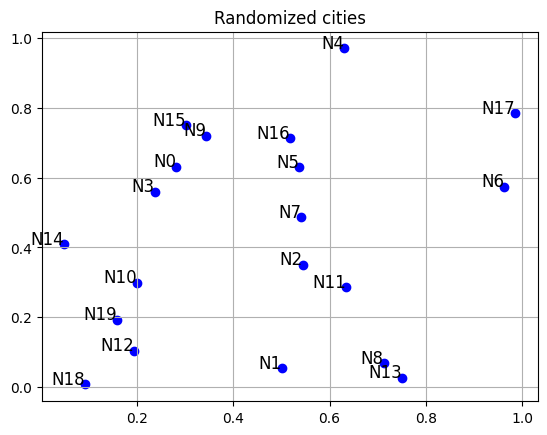

In [7]:
from travelingsalesperson import TSP 
from amplify import solve

n = 20

# setting up the TSP problem 
tsp = TSP(n, initial_plot=True)

qp = tsp.qubo(format="amplify", penalty=30)
model = qp["model"]

## Brute Force

In [8]:
try:
    (tour, cost), dur = tsp.brute_force()
    tsp.draw_tour(tour)

    print("Tour: ", tour, "Cost: ", cost)
except KeyboardInterrupt as e:
    print(e)
    cost = "NaN"
    dur = "NaN"
    tour = "NaN"

from utils import add_data
add_data(n, cost, dur, tour, "brute_force")

inner1 took too long


## Fixstars Amplify AE

In [9]:
# Initialise Fixstars Client
from Utils.solvers import GetFixstarClient

clientFS = GetFixstarClient()

# Solve set partitioning and view result
resultF = solve(model, clientFS)

tsp.interpret(resultF, solver="Fixstar", verbose=True)

Cost: 30.0
Optimal tour: [14. 10. 19. 18. 12.  1. 13.  8. 11.  2.  7.  6. 17.  4.  5. 16.  9. 15.
  0.  3.]
Execution time: 0:00:00.976711


## Gurobi

In [10]:
from Utils.solvers import GetGurobiClient

clientG = GetGurobiClient(r"D:\miniconda3\envs\cwq\gurobi110.dll")
resultG = solve(model, clientG)

tourG = tsp.interpret(resultG, solver="Gurobi", verbose=True)

Cost: 31.0
Optimal tour: [ 0. 15.  9.  3. 14. 10. 19. 18. 12.  1.  8. 13. 11.  2.  6. 17.  4. 16.
  5.  7.]
Execution time: 0:01:40.182999


## D-Wave

In [6]:
from Utils.solvers import GetDWaveClient

clientDWave = GetDWaveClient()

result = solve(model, clientDWave)
try:
    tourD = tsp.interpret(result, solver="D-Wave", verbose=True)
except RuntimeError as e:
    print(e)
    add_data(n, "NaN", "NaN", "NaN", "D-Wave")

RuntimeError: both clique and minor embeddings failed: the problem size may be too large to embed in the target graph